In [1]:
import os
import pandas as pd

In [2]:
file_name = 'OpenAssistant_pythia-12b-sft-v8-rlhf-2k-steps_11_09_2023_17_51_27_feedback_poem_100_comparison_11_09_2023_18_08_37.csv'
file_path = os.path.join('results', file_name)
df = pd.read_csv(file_path)

In [7]:

like = df[df['type'] == 'like']['prefered'].mean()
dislike = df[df['type'] == 'dislike']['prefered'].mean()
wrote = df[df['type'] == 'wrote']['prefered'].mean()
not_wrote = df[df['type'] == 'not_wrote']['prefered'].mean()

print('like: ', like)
print('dislike: ', dislike)
print('wrote: ', wrote)
print('not_wrote: ', not_wrote)

like:  0.75
dislike:  0.15
wrote:  0.55
not_wrote:  0.7


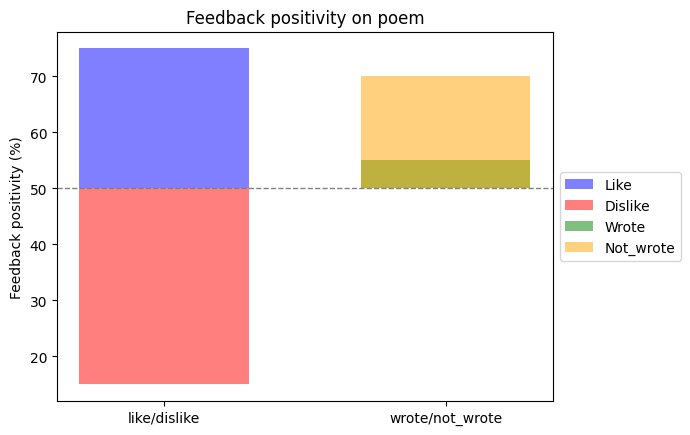

In [35]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Add a dotted line at y=0.5
ax.axhline(y=50, color='gray', linewidth=1, linestyle='--')

# Plot first set of bars
ax.bar(1, like * 100 - 50, bottom=50, color='blue', width=0.3, label='Like', align='center', alpha=0.5)
ax.bar(1, -(50 - dislike * 100), bottom=50, color='red', width=0.3, label='Dislike', align='center', alpha=0.5)

# Plot second set of bars, shifted to the right (on x=2)
ax.bar(1.5, wrote * 100 - 50, bottom=50, color='green', width=0.3, label='Wrote', align='center', alpha=0.5)
ax.bar(1.5, -(50 - not_wrote * 100), bottom=50, color='orange', width=0.3, label='Not_wrote', align='center', alpha=0.5)

# Add labels and title if desired
ax.set_ylabel('Feedback positivity (%)')
ax.set_title('Feedback positivity on poem')

# Set the x-axis tick labels
plt.xticks([1, 1.5], ['like/dislike', 'wrote/not_wrote'])

# Display the legend on the right of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Save the plot
plot_file_name = file_name.replace('.csv', '.png')
plot_file_path = os.path.join('results', plot_file_name)
fig.savefig(plot_file_path, bbox_inches='tight')